# Processing of the results

First some imports

In [1]:
import os

from gravann.input import csv_reader
from gravann.functions import unit_conversion

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import ast
import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

### Result Consolidation
Next, we read all finalized CSV files from the given input directories and concatenate them into one DataFrame:

In [2]:
# Some variables used over the whole notebook
sample = "churyumov-gerasimenko"
output_directory = Path(f"./results/{sample}")
error_of_interest = "relRMSE"

df = csv_reader.read_result_csv(
    [
        Path(f"./results/{sample}/pretrain/re-validation"),
        Path(f"./results/{sample}/re-validation"),
        Path(f"./results/{sample}/posttrain/re-validation"),
        Path(f"./results/{sample}/posttrain/posttrain-0_1"),
        Path(f"./results/{sample}/posttrain/posttrain-1"),
    ],
    include=["validation_final_result.csv", "results.csv"],
    exclude=["validation_results.csv"]
)
df

,sample,pretrained_model,output_folder,run_id,plotting_points,seed,ground_truth,resolution,loss,batch_size,...,relRMSE@Altitude_9,Normalized L1 Loss@High Altitude,Normalized Relative Component Loss@High Altitude,RMSE@High Altitude,relRMSE@High Altitude,Normalized L1 Loss@Low Altitude,Normalized Relative Component Loss@Low Altitude,RMSE@Low Altitude,relRMSE@Low Altitude,low_resolution
0,churyumov-gerasimenko,NaN,results/pretrain-3,9,2500,2023,polyhedral,0.1%,normalized_L1_loss,1000,...,0.001742,0.243009,0.319324,0.891220,0.387531,0.340218,0.376631,1.229114,0.456091,NaN
1,churyumov-gerasimenko,NaN,results/pretrain-3,4,2500,42,polyhedral,0.1%,normalized_L1_loss,1000,...,0.001757,0.243016,0.319383,0.889810,0.387722,0.338965,0.375233,1.200275,0.447725,NaN
2,churyumov-gerasimenko,NaN,results/pretrain-3,8,2500,1999,polyhedral,0.1%,normalized_L1_loss,1000,...,0.001754,0.243368,0.319846,0.890820,0.388085,0.341383,0.378013,1.246698,0.462277,NaN
3,churyumov-gerasimenko,NaN,results/pretrain-3,7,2500,433,polyhedral,0.1%,normalized_L1_loss,1000,...,0.001743,0.242342,0.318495,0.888598,0.387430,0.339693,0.376133,1.234056,0.459495,NaN
4,churyumov-gerasimenko,NaN,results/pretrain-3,2,2500,9,polyhedral,0.1%,normalized_L1_loss,1000,...,0.001739,0.243368,0.319820,0.893603,0.389279,0.339952,0.376413,1.226245,0.456085,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,churyumov-gerasimenko,./results/pretrain/pretrain-2-2/churyumov-gera...,results/posttrain-10-0010it,65,2500,3,polyhedral,100%,normalized_L1_loss,1000,...,0.010826,0.594544,0.761203,1.950660,0.804704,0.781025,0.843723,2.546330,0.900724,NaN
1112,churyumov-gerasimenko,./results/pretrain/pretrain-2-2/churyumov-gera...,results/posttrain-10-0010it,66,2500,3,polyhedral,100%,normalized_L1_loss,1000,...,0.000851,0.088833,0.117188,0.383207,0.167734,0.114031,0.124776,0.451641,0.167685,NaN
1113,churyumov-gerasimenko,./results/pretrain/pretrain-2-2/churyumov-gera...,results/posttrain-10-0010it,67,2500,3,polyhedral,100%,normalized_L1_loss,1000,...,0.000537,0.066321,0.087543,0.283017,0.127085,0.093007,0.101372,0.368677,0.137424,NaN
1114,churyumov-gerasimenko,./results/pretrain/pretrain-2-2/churyumov-gera...,results/posttrain-10-0010it,68,2500,3,polyhedral,100%,normalized_L1_loss,1000,...,0.000595,0.086065,0.115546,0.402670,0.183208,0.104110,0.114634,0.503169,0.181357,NaN


In [3]:
# Replace resolution in-place with "10%" if column "low_resolution" has value True and drop the unnecessary column
df["low_resolution"].fillna(False, inplace=True)
df.loc[df["low_resolution"], "resolution"] = "10%"
df.drop("low_resolution", axis=1, inplace=True)
df["resolution"].fillna("100%", inplace=True)

# Adapt the line pretrained_model to the new format
df["pretrained_model"].fillna("None", inplace=True)
df.loc[df["pretrained_model"].str.contains("pretrain-3"), "pretrained_model"] = "0.1%"
df.loc[df["pretrained_model"].str.contains("pretrain-2"), "pretrained_model"] = "1%"
df.loc[df["pretrained_model"].str.contains("pretrain-0|pretrain-1"), "pretrained_model"] = "10%"

# c refers to the last model, not the first and can be re-calculated --> drop it
df.drop(["c"], axis=1, inplace=True)

In [4]:
df

,sample,pretrained_model,output_folder,run_id,plotting_points,seed,ground_truth,resolution,loss,batch_size,...,RMSE@Altitude_9,relRMSE@Altitude_9,Normalized L1 Loss@High Altitude,Normalized Relative Component Loss@High Altitude,RMSE@High Altitude,relRMSE@High Altitude,Normalized L1 Loss@Low Altitude,Normalized Relative Component Loss@Low Altitude,RMSE@Low Altitude,relRMSE@Low Altitude
0,churyumov-gerasimenko,None,results/pretrain-3,9,2500,2023,polyhedral,0.1%,normalized_L1_loss,1000,...,6.782644e-07,0.001742,0.243009,0.319324,0.891220,0.387531,0.340218,0.376631,1.229114,0.456091
1,churyumov-gerasimenko,None,results/pretrain-3,4,2500,42,polyhedral,0.1%,normalized_L1_loss,1000,...,6.839968e-07,0.001757,0.243016,0.319383,0.889810,0.387722,0.338965,0.375233,1.200275,0.447725
2,churyumov-gerasimenko,None,results/pretrain-3,8,2500,1999,polyhedral,0.1%,normalized_L1_loss,1000,...,6.826147e-07,0.001754,0.243368,0.319846,0.890820,0.388085,0.341383,0.378013,1.246698,0.462277
3,churyumov-gerasimenko,None,results/pretrain-3,7,2500,433,polyhedral,0.1%,normalized_L1_loss,1000,...,6.783692e-07,0.001743,0.242342,0.318495,0.888598,0.387430,0.339693,0.376133,1.234056,0.459495
4,churyumov-gerasimenko,None,results/pretrain-3,2,2500,9,polyhedral,0.1%,normalized_L1_loss,1000,...,6.768238e-07,0.001739,0.243368,0.319820,0.893603,0.389279,0.339952,0.376413,1.226245,0.456085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,churyumov-gerasimenko,1%,results/posttrain-10-0010it,65,2500,3,polyhedral,100%,normalized_L1_loss,1000,...,4.223522e-06,0.010826,0.594544,0.761203,1.950660,0.804704,0.781025,0.843723,2.546330,0.900724
1112,churyumov-gerasimenko,1%,results/posttrain-10-0010it,66,2500,3,polyhedral,100%,normalized_L1_loss,1000,...,3.313432e-07,0.000851,0.088833,0.117188,0.383207,0.167734,0.114031,0.124776,0.451641,0.167685
1113,churyumov-gerasimenko,1%,results/posttrain-10-0010it,67,2500,3,polyhedral,100%,normalized_L1_loss,1000,...,2.097099e-07,0.000537,0.066321,0.087543,0.283017,0.127085,0.093007,0.101372,0.368677,0.137424
1114,churyumov-gerasimenko,1%,results/posttrain-10-0010it,68,2500,3,polyhedral,100%,normalized_L1_loss,1000,...,2.319304e-07,0.000595,0.086065,0.115546,0.402670,0.183208,0.104110,0.114634,0.503169,0.181357


And then we save the unified DataFrame to a CSV file, which can be uploaded to the repository since it contains everything in a readable nice format:

In [5]:
filename = f"total_results_{sample}.csv"
df.to_csv(output_directory.joinpath(filename), index=False)

# Processing and Data Visualization

This step uses the previously created CSV file to create a DataFrame that is easier to work with and independent of the used input directories. Start here, if you just have the file with all results.

In [146]:
filename = f"total_results_{sample}.csv"
df = pd.read_csv(output_directory.joinpath(filename))
df_copy = df.copy()

In [147]:
interesting_columns = ["sample", "pretrained_model", "seed", "ground_truth", "resolution", "sample_domain", "noise", "iterations", "integration_points"]
interesting_columns.extend([col for col in df if col.startswith(error_of_interest)])
interesting_columns = [x for x in interesting_columns if "@High Altitude" not in x and "@Low Altitude" not in x]

df = df[interesting_columns]
df

,sample,pretrained_model,seed,ground_truth,resolution,sample_domain,noise,iterations,integration_points,relRMSE@Altitude_0,relRMSE@Altitude_1,relRMSE@Altitude_2,relRMSE@Altitude_3,relRMSE@Altitude_4,relRMSE@Altitude_5,relRMSE@Altitude_6,relRMSE@Altitude_7,relRMSE@Altitude_8,relRMSE@Altitude_9
0,churyumov-gerasimenko,None,2023,polyhedral,0.1%,"[0.0, 1.0]",[''],10000,300000,0.464906,0.451826,0.517527,0.396562,0.329448,0.103043,0.062150,0.015749,0.008338,0.001742
1,churyumov-gerasimenko,None,42,polyhedral,0.1%,"[0.0, 1.0]",[''],10000,300000,0.478600,0.472800,0.474701,0.401489,0.324469,0.103753,0.062361,0.015831,0.008355,0.001757
2,churyumov-gerasimenko,None,1999,polyhedral,0.1%,"[0.0, 1.0]",[''],10000,300000,0.467474,0.452431,0.570987,0.391071,0.328477,0.103552,0.062586,0.015889,0.008337,0.001754
3,churyumov-gerasimenko,None,433,polyhedral,0.1%,"[0.0, 1.0]",[''],10000,300000,0.475617,0.472834,0.478239,0.395436,0.325620,0.103527,0.062006,0.015869,0.008348,0.001743
4,churyumov-gerasimenko,None,9,polyhedral,0.1%,"[0.0, 1.0]",[''],10000,300000,0.478060,0.467077,0.451270,0.394462,0.327116,0.103045,0.063098,0.015793,0.008359,0.001739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,churyumov-gerasimenko,1%,3,polyhedral,100%,"[3.0, 5.0]","['gaussian', 0.0, 1.467314]",10,300000,0.990426,0.930283,0.942440,0.849135,0.855718,0.670402,0.517863,0.102305,0.052136,0.010826
1112,churyumov-gerasimenko,1%,3,polyhedral,100%,"[3.0, 5.0]","['constant_bias', [0.000272, 0.0, 0.0]]",10,300000,0.177777,0.149129,0.150929,0.121723,0.112640,0.131650,0.092157,0.008250,0.004127,0.000851
1113,churyumov-gerasimenko,1%,3,polyhedral,100%,"[3.0, 5.0]","['adaptive_gaussian_noise', 0.1]",10,300000,0.133446,0.137280,0.154105,0.090021,0.077680,0.091580,0.060906,0.005116,0.002622,0.000537
1114,churyumov-gerasimenko,1%,3,polyhedral,100%,"[3.0, 5.0]","['adaptive_gaussian_noise', 0.01]",10,300000,0.182716,0.155159,0.144203,0.102181,0.097875,0.160607,0.115094,0.006545,0.002961,0.000595


Time to replace the altitudes and make them more readable:

In [148]:
ALTITUDES = ast.literal_eval(df_copy.at[0, "validation_sampling_altitudes"])
print("The normalized altitudes are:")
print(ALTITUDES)
print("The converted altitudes to [km] are:")
print(unit_conversion.convert_altitude(sample, np.array(ALTITUDES), unit='km'))

The normalized altitudes are:
[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0]
The converted altitudes to [km] are:
[3.12660645e-03 1.56330322e-02 3.12660645e-02 1.56330322e-01
 3.12660645e-01 1.56330322e+00 3.12660645e+00 1.56330322e+01
 3.12660645e+01 1.56330322e+02]


In [149]:
unit_conversion.convert_pandas_altitudes(df, ALTITUDES, convert_height=False, only_height=True)
df

,sample,pretrained_model,seed,ground_truth,resolution,sample_domain,noise,iterations,integration_points,0.001,0.005,0.01,0.05,0.1,0.5,1.0,5.0,10.0,50.0
0,churyumov-gerasimenko,None,2023,polyhedral,0.1%,"[0.0, 1.0]",[''],10000,300000,0.464906,0.451826,0.517527,0.396562,0.329448,0.103043,0.062150,0.015749,0.008338,0.001742
1,churyumov-gerasimenko,None,42,polyhedral,0.1%,"[0.0, 1.0]",[''],10000,300000,0.478600,0.472800,0.474701,0.401489,0.324469,0.103753,0.062361,0.015831,0.008355,0.001757
2,churyumov-gerasimenko,None,1999,polyhedral,0.1%,"[0.0, 1.0]",[''],10000,300000,0.467474,0.452431,0.570987,0.391071,0.328477,0.103552,0.062586,0.015889,0.008337,0.001754
3,churyumov-gerasimenko,None,433,polyhedral,0.1%,"[0.0, 1.0]",[''],10000,300000,0.475617,0.472834,0.478239,0.395436,0.325620,0.103527,0.062006,0.015869,0.008348,0.001743
4,churyumov-gerasimenko,None,9,polyhedral,0.1%,"[0.0, 1.0]",[''],10000,300000,0.478060,0.467077,0.451270,0.394462,0.327116,0.103045,0.063098,0.015793,0.008359,0.001739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,churyumov-gerasimenko,1%,3,polyhedral,100%,"[3.0, 5.0]","['gaussian', 0.0, 1.467314]",10,300000,0.990426,0.930283,0.942440,0.849135,0.855718,0.670402,0.517863,0.102305,0.052136,0.010826
1112,churyumov-gerasimenko,1%,3,polyhedral,100%,"[3.0, 5.0]","['constant_bias', [0.000272, 0.0, 0.0]]",10,300000,0.177777,0.149129,0.150929,0.121723,0.112640,0.131650,0.092157,0.008250,0.004127,0.000851
1113,churyumov-gerasimenko,1%,3,polyhedral,100%,"[3.0, 5.0]","['adaptive_gaussian_noise', 0.1]",10,300000,0.133446,0.137280,0.154105,0.090021,0.077680,0.091580,0.060906,0.005116,0.002622,0.000537
1114,churyumov-gerasimenko,1%,3,polyhedral,100%,"[3.0, 5.0]","['adaptive_gaussian_noise', 0.01]",10,300000,0.182716,0.155159,0.144203,0.102181,0.097875,0.160607,0.115094,0.006545,0.002961,0.000595


In [150]:
unit_conversion.convert_altitude(sample, np.array(ALTITUDES), unit='m')

array([3.12660645e+00, 1.56330322e+01, 3.12660645e+01, 1.56330322e+02,
       3.12660645e+02, 1.56330322e+03, 3.12660645e+03, 1.56330322e+04,
       3.12660645e+04, 1.56330322e+05])

In [151]:
df = df.drop(
    ["sample", "seed"], axis=1
)
df["sample_domain"] = df["sample_domain"].apply(lambda x: str(x))
df["iterations"] = df["iterations"].apply(lambda x: str(x))


# Melt columns "ground_truth" and "pretrained_model" into one column called "training_type"
df["training_type"] = df["ground_truth"] + " (" + df["pretrained_model"] + ", " + df["iterations"] + ")"
df.drop(["ground_truth", "pretrained_model", "iterations"], axis=1, inplace=True)

# Just select those columns with resolution 100% and drop the resolution column
df = df[df["resolution"] == "100%"]
df.drop("resolution", axis=1, inplace=True)

df.groupby(["sample_domain", "noise", "training_type"]).mean()

integration_points  \
sample_domain noise                              training_type                                  
[0. 1.]       ['']                               mascon (None, 10000)                300000.0   
                                                 polyhedral (None, 10000)            300000.0   
              ['adaptive_gaussian_noise', 0.001] mascon (None, 10000)                300000.0   
                                                 polyhedral (None, 10000)            300000.0   
              ['adaptive_gaussian_noise', 0.01]  mascon (None, 10000)                300000.0   
...                                                                                       ...   
[3. 5.]       ['gaussian', 0.0, 1.467314]        polyhedral (1%, 10)                 300000.0   
                                                 polyhedral (1%, 100)                300000.0   
                                                 polyhedral (1%, 1000)               300000.0   
                                                 polyhedral (10%, 1000)              300000.0   
                                                 polyhedral (None, 10000)            300000.0   

                                                                              0.001  \
sample_domain noise                              training_type                        
[0. 1.]       ['']                               mascon (None, 10000)      0.061507   
                                                 polyhedral (None, 10000)  0.058438   
              ['adaptive_gaussian_noise', 0.001] mascon (None, 10000)      0.061561   
                                                 polyhedral (None, 10000)  0.055858   
              ['adaptive_gaussian_noise', 0.01]  mascon (None, 10000)      0.079876   
...                                                                             ...   
[3. 5.]       ['gaussian', 0.0, 1.467314]        polyhedral (1%, 10)       1.067749   
                                                 polyhedral (1%, 100)      0.880500   
                                                 polyhedral (1%, 1000)     0.884833   
                                                 polyhedral (10%, 1000)    1.215827   
                                                 polyhedral (None, 10000)  1.342224   

                                                                              0.005  \
sample_domain noise                              training_type                        
[0. 1.]       ['']                               mascon (None, 10000)      0.036389   
                                                 polyhedral (None, 10000)  0.041732   
              ['adaptive_gaussian_noise', 0.001] mascon (None, 10000)      0.061913   
                                                 polyhedral (None, 10000)  0.055544   
              ['adaptive_gaussian_noise', 0.01]  mascon (None, 10000)      0.054721   
...                                                                             ...   
[3. 5.]       ['gaussian', 0.0, 1.467314]        polyhedral (1%, 10)       1.053969   
                                                 polyhedral (1%, 100)      0.890724   
                                                 polyhedral (1%, 1000)     0.896563   
                                                 polyhedral (10%, 1000)    1.231835   
                                                 polyhedral (None, 10000)  1.345036   

                                                                               0.01  \
sample_domain noise                              training_type                        
[0. 1.]       ['']                               mascon (None, 10000)      0.022287   
                                                 polyhedral (None, 10000)  0.022997   
              ['adaptive_gaussian_noise', 0.001] mascon (None, 10000)      0.045265   
                                                 polyhedral (None, 10000)  0.022296   
              ['adaptive_ga

Time for plotting. First make the DataFrame wide

In [152]:
str_altitudes = [str(x) for x in ALTITUDES]

dfm = df.melt(["sample_domain", "noise", "training_type"], str_altitudes, var_name="Distance", value_name=error_of_interest)


dfm = dfm[dfm["noise"] != "['combined', 0.0, 0.146731, [0.000272, 0.0, 0.0]]"]
dfm = dfm[dfm["noise"] != "['combined', 0.0, 1.467314, [0.000272, 0.0, 0.0]]"]


noise_replacement = {
    "['']" : "No Noise",
    "['constant_bias', [0.000272, 0.0, 0.0]]": "Constant Bias $\c = 0.000272$",
    "['gaussian', 0.0, 0.146731]": "Additive Gaussian $\mu = 0 \; \sigma= 0.14$",
    "['gaussian', 0.0, 1.467314]": "Additive Gaussian $\mu = 0 \; \sigma= 1.47$",
    "['adaptive_gaussian_noise', 0.001]": "Multiplicative Gaussian $\mu = 1 \; \sigma= 0.001$",
    "['adaptive_gaussian_noise', 0.01]": "Multiplicative Gaussian $\mu = 1 \; \sigma= 0.01$",
    "['adaptive_gaussian_noise', 0.1]": "Multiplicative Gaussian $\mu = 1 \; \sigma= 0.1$"
}

sample_distance_replacement = {
    "[0. 1.]": "$(0, 1)$",
    "[1. 3.]": "$(1, 3)$",
    "[3. 5.]": "$(3, 5)$",
}

for key, replacement in noise_replacement.items():
     dfm["noise"].replace(key, replacement, inplace=True)

for key, replacement in sample_distance_replacement.items():
    dfm["sample_domain"].replace(key, replacement, inplace=True)


dfm["Distance"] = dfm["Distance"].apply(lambda x: float(x))
dfm[error_of_interest] = dfm[error_of_interest].apply(lambda x: float(x))
dfm

,sample_domain,noise,training_type,Distance,relRMSE
0,"$(3, 5)$",Additive Gaussian $\mu = 0 \; \sigma= 1.47$,"mascon (None, 10000)",0.001,1.235477
2,"$(0, 1)$",No Noise,"mascon (None, 10000)",0.001,0.129189
3,"$(3, 5)$",Constant Bias $\c = 0.000272$,"mascon (None, 10000)",0.001,0.843429
5,"$(1, 3)$",Additive Gaussian $\mu = 0 \; \sigma= 0.14$,"mascon (None, 10000)",0.001,0.921531
6,"$(3, 5)$",Additive Gaussian $\mu = 0 \; \sigma= 0.14$,"mascon (None, 10000)",0.001,1.179126
...,...,...,...,...,...
10855,"$(3, 5)$",Additive Gaussian $\mu = 0 \; \sigma= 1.47$,"polyhedral (1%, 10)",50.000,0.010826
10856,"$(3, 5)$",Constant Bias $\c = 0.000272$,"polyhedral (1%, 10)",50.000,0.000851
10857,"$(3, 5)$",Multiplicative Gaussian $\mu = 1 \; \sigma= 0.1$,"polyhedral (1%, 10)",50.000,0.000537
10858,"$(3, 5)$",Multiplicative Gaussian $\mu = 1 \; \sigma= 0.01$,"polyhedral (1%, 10)",50.000,0.000595


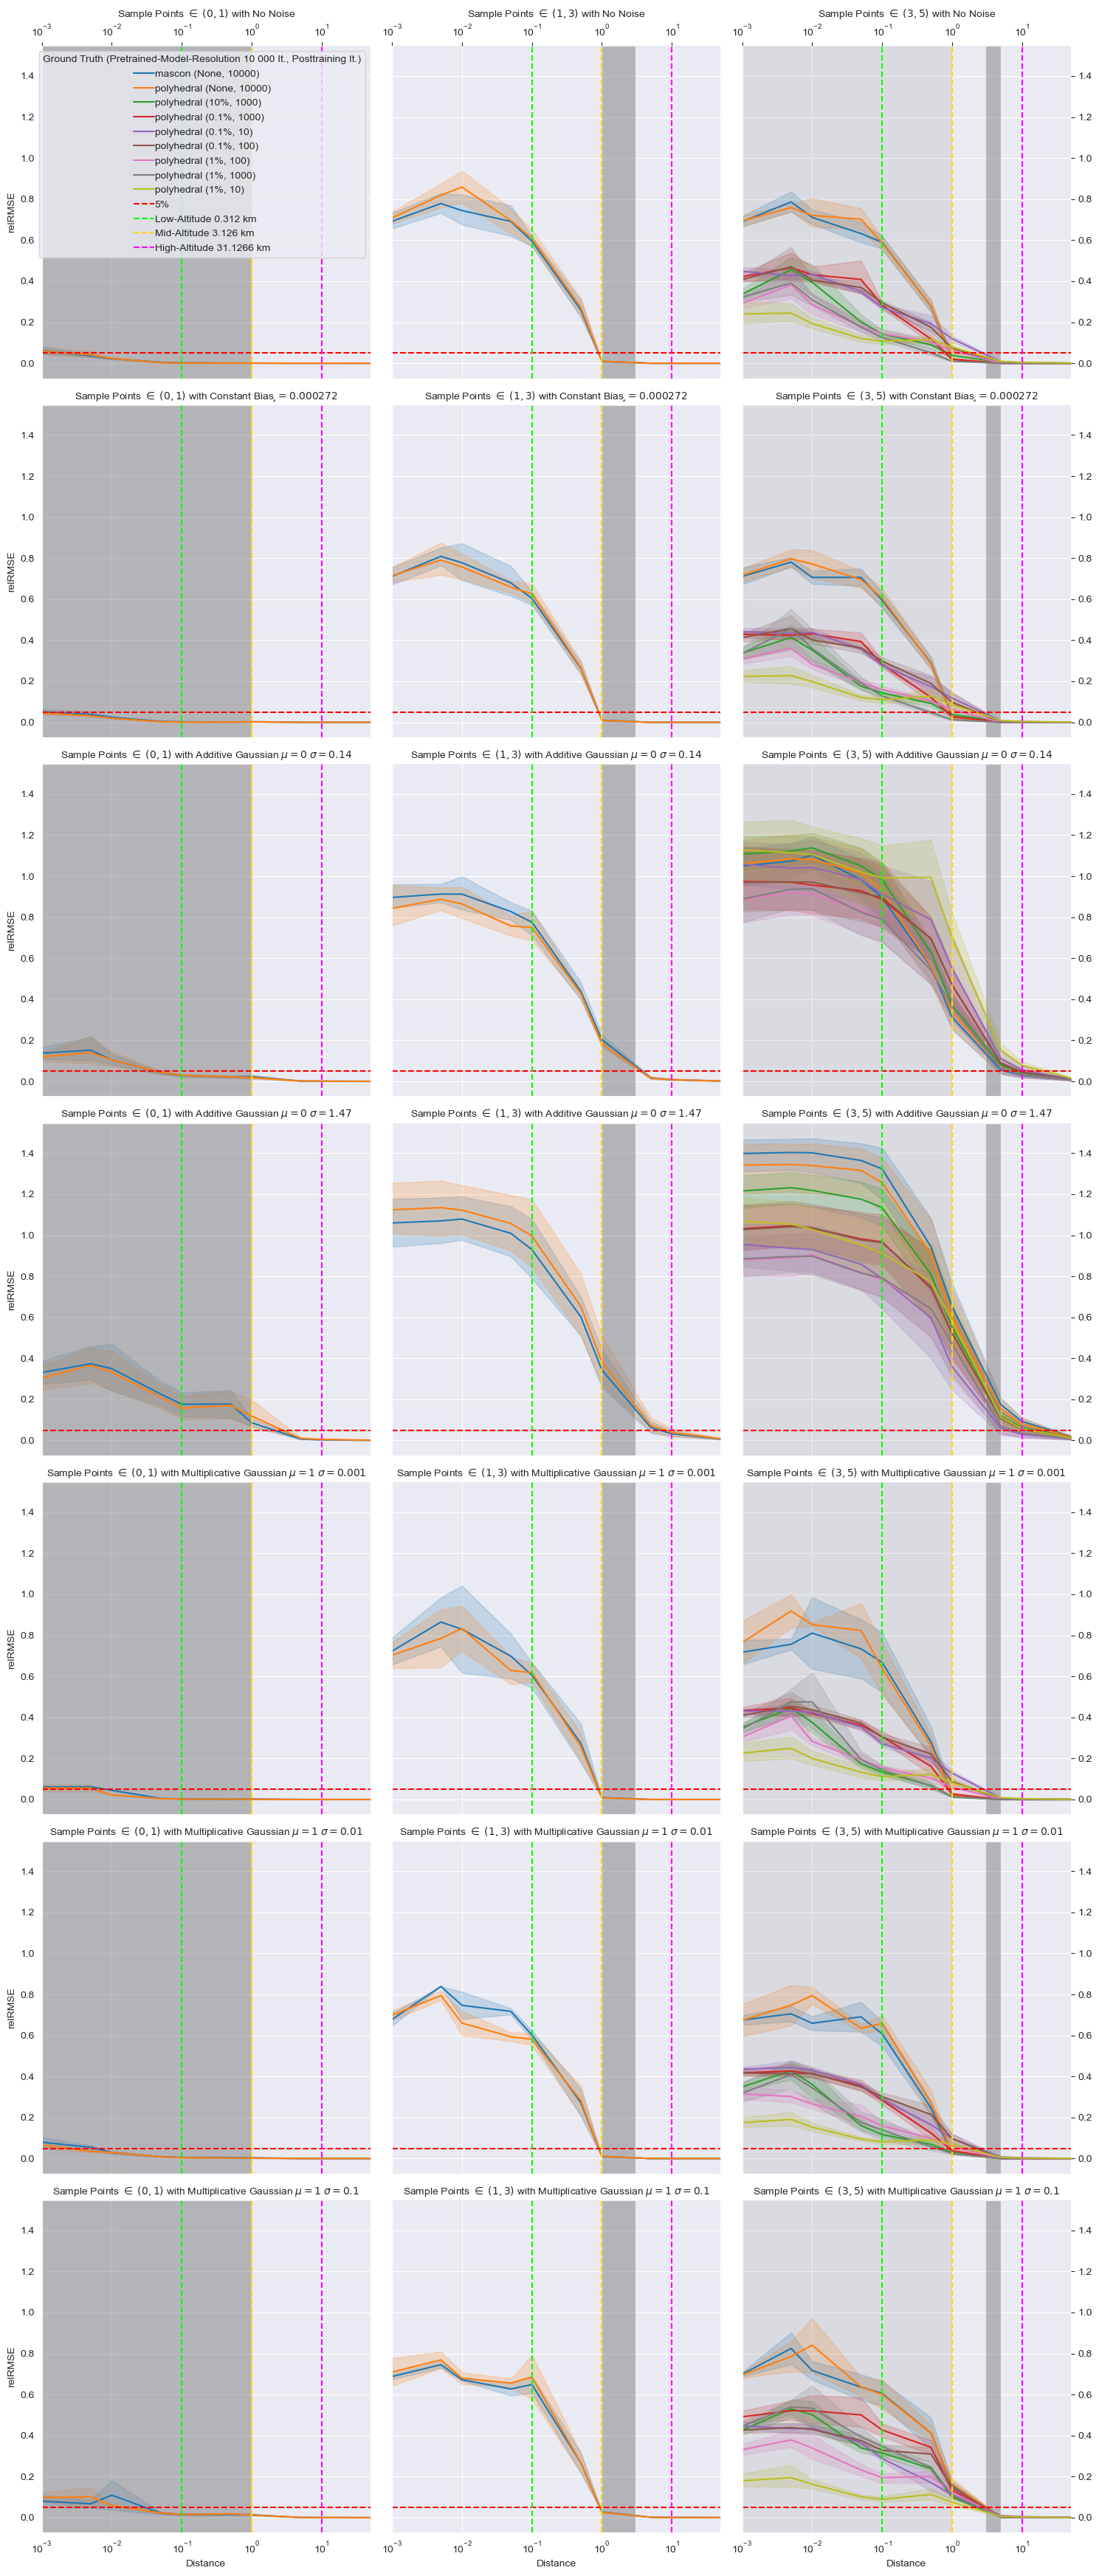

In [155]:
g = sns.relplot(
    data=dfm, kind="line",
    x="Distance", y=error_of_interest, col="sample_domain", row="noise",
    col_order=sorted(sample_distance_replacement.values()),
    row_order=noise_replacement.values(),
    hue="training_type",
    facet_kws=dict(legend_out=False)
)

g.set_titles("Sample Points $\in$ {col_name} with {row_name}")


g.set(xlim=(0.0, 50.0), xscale='log')#, yscale='log')
g.map(plt.axhline, y=0.05, ls='--', c='red', label="5%")
g.map(plt.axvline, x=0.1, ls='--', c='lime', label="Low-Altitude 0.312 km")
g.map(plt.axvline, x=1.0, ls='--', c='gold', label="Mid-Altitude 3.126 km")
g.map(plt.axvline, x=10.0, ls='--', c='fuchsia', label="High-Altitude 31.1266 km")



for ax in g.axes[0,:]:
    ax.tick_params(top=True, labeltop=True, labelrotation=0)
    ax.set_xlabel("Distance")
    ax.xaxis.set_label_position('top')
for ax in g.axes[:,0]:
    ax.axvspan(0, 1.0, facecolor='gray', alpha=0.5)
for ax in g.axes[:,1]:
    ax.axvspan(1.0, 3.0, facecolor='gray', alpha=0.5)
for ax in g.axes[:,2]:
    ax.axvspan(3.0, 5.0, facecolor='gray', alpha=0.5)
    ax.axvspan(0.0, 1.0, facecolor='gray', alpha=0.15)
    ax.tick_params(right=True, labelright=True, labelrotation=0)

g.legend.remove()
g.add_legend(handletextpad=0.1, title="Ground Truth (Pretrained-Model-Resolution 10 000 It., Posttraining It.)")
g.tight_layout()
save_path = os.path.join(output_directory, f"{sample}_norm_{error_of_interest}_line.png")
g.savefig(save_path, dpi=300)

In [132]:
# g = sns.catplot(
#     data=dfm, kind="bar",
#     x="Distance", y=error_of_interest, col="sample_domain", row="noise",
#     col_order=["[0. 1.]", "[1. 3.]", "[3. 5.]"],
#     row_order=["['']", "['gaussian', 0.0, 0.146731]", "['gaussian', 0.0, 1.467314]",
#                "['constant_bias', [0.000272, 0.0, 0.0]]", "['combined', 0.0, 0.146731, [0.000272, 0.0, 0.0]]",
#                "['combined', 0.0, 1.467314, [0.000272, 0.0, 0.0]]"],
#     hue_order=["polyhedral", "mascon"],
#     hue="ground_truth"
# )
# g.map(plt.axhline, y=0.05, ls='--', c='red')
# # g.set_titles(col_template="{col_name} patrons", row_template="{row_name}")
# # g.set(xlim=(0, 60), ylim=(0, 12), xticks=[10, 30, 50], yticks=[2, 6, 10])
# g.tight_layout()
# save_path = os.path.join(output_directory, f"{sample}_norm_{error_of_interest}_bar.png")
# g.savefig(save_path, dpi=300)

ValueError: Could not interpret input 'ground_truth'

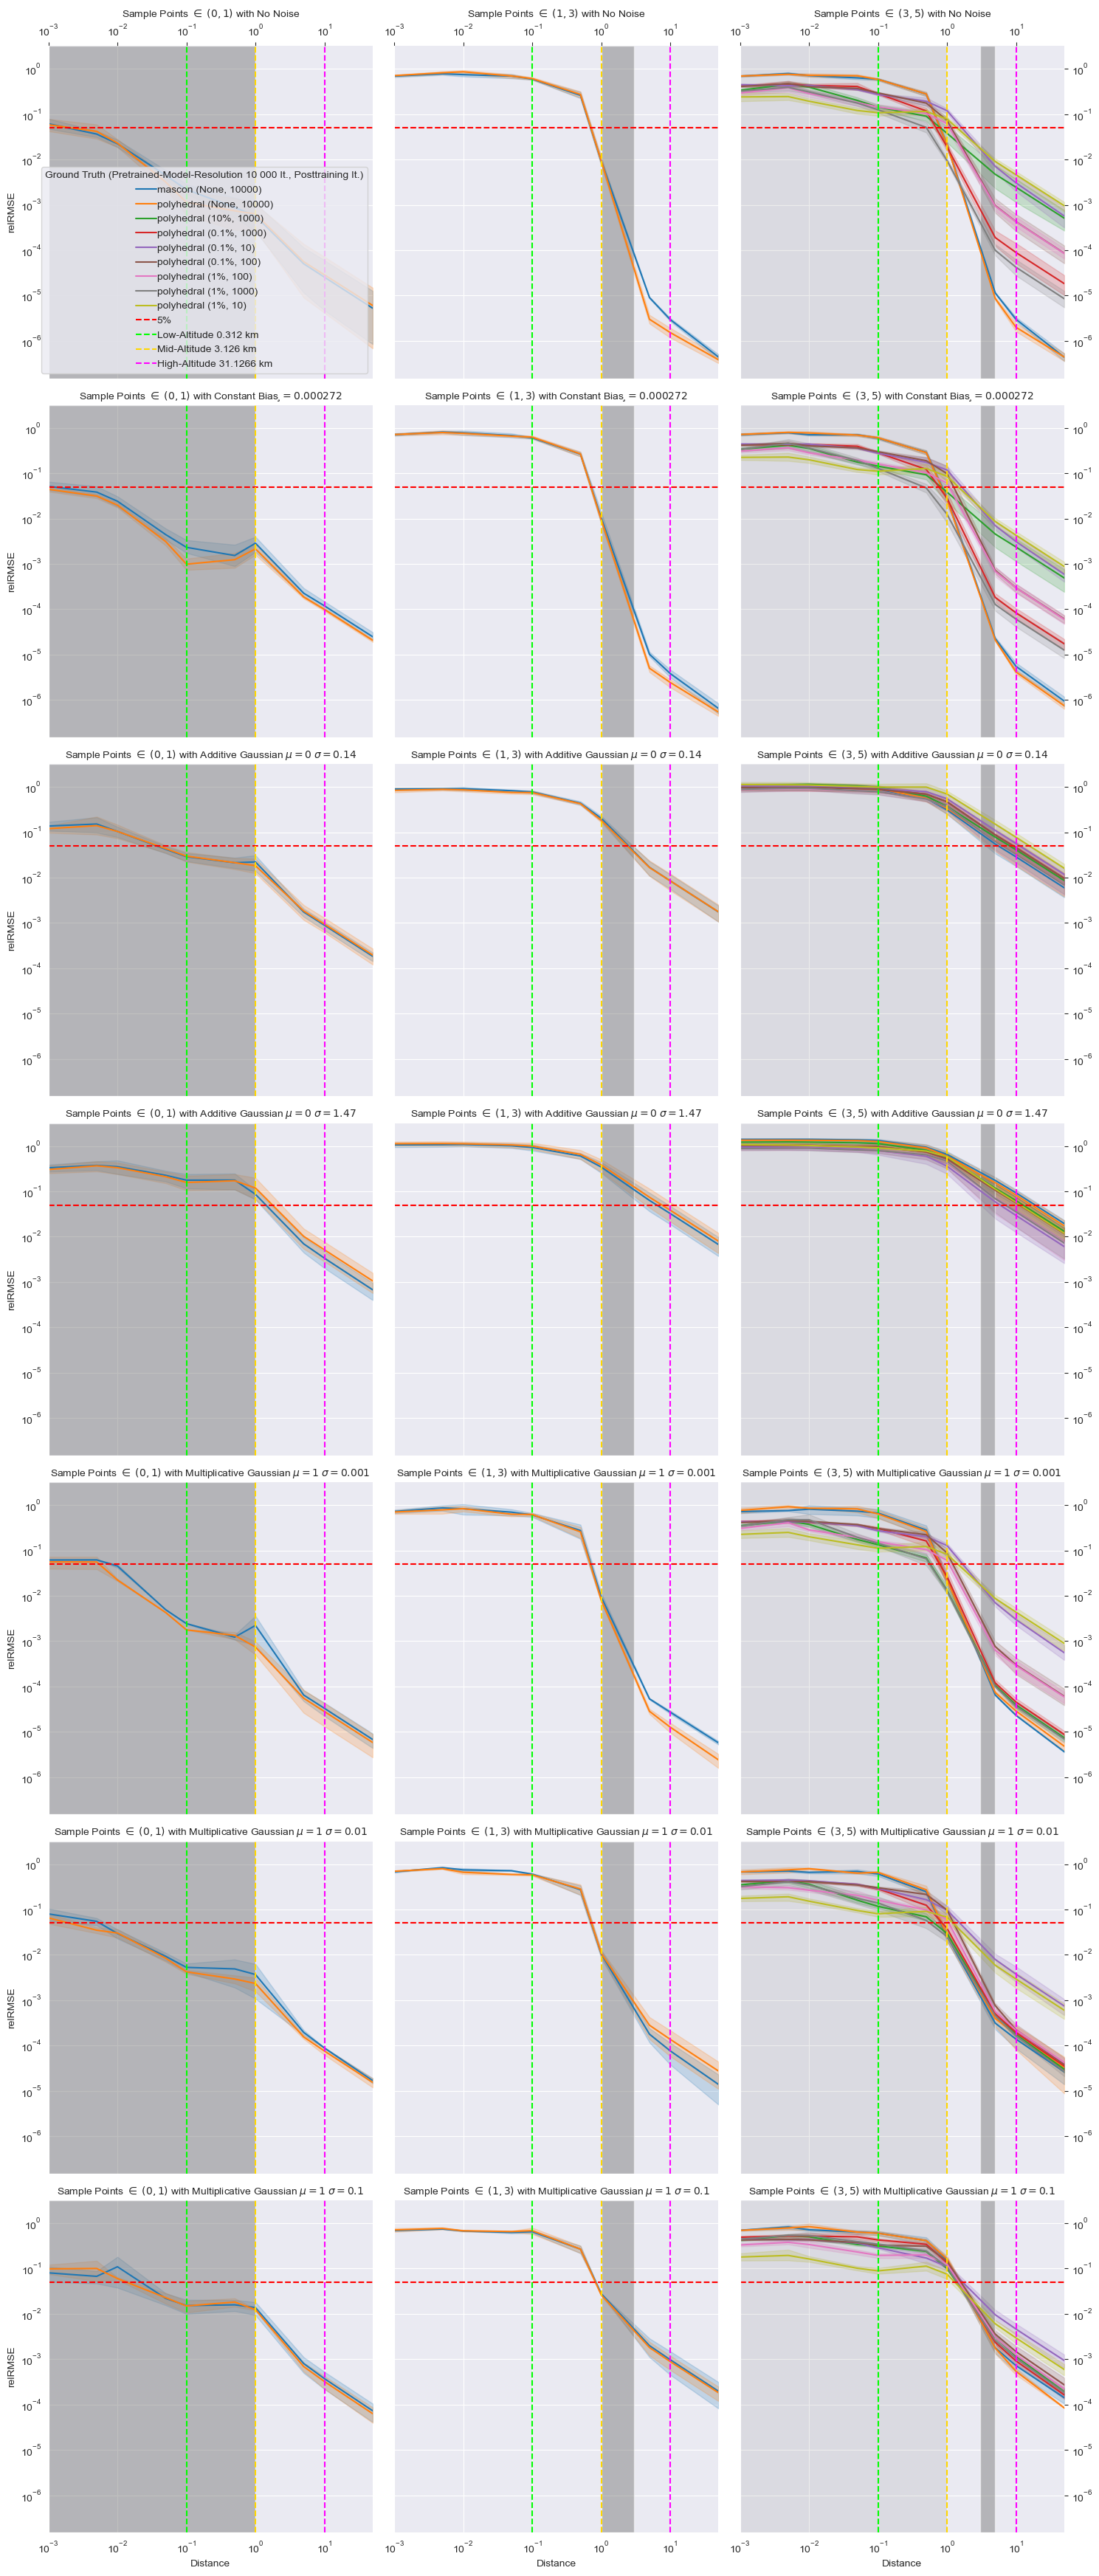

In [156]:
g = sns.relplot(
    data=dfm, kind="line",
    x="Distance", y=error_of_interest, col="sample_domain", row="noise",
    col_order=sorted(sample_distance_replacement.values()),
    row_order=noise_replacement.values(),
    hue="training_type",
    facet_kws=dict(legend_out=False)
)

g.set_titles("Sample Points $\in$ {col_name} with {row_name}")


g.set(xlim=(0.0, 50.0), xscale='log', yscale='log')
g.map(plt.axhline, y=0.05, ls='--', c='red', label="5%")
g.map(plt.axvline, x=0.1, ls='--', c='lime', label="Low-Altitude 0.312 km")
g.map(plt.axvline, x=1.0, ls='--', c='gold', label="Mid-Altitude 3.126 km")
g.map(plt.axvline, x=10.0, ls='--', c='fuchsia', label="High-Altitude 31.1266 km")



for ax in g.axes[0,:]:
    ax.tick_params(top=True, labeltop=True, labelrotation=0)
    ax.set_xlabel("Distance")
    ax.xaxis.set_label_position('top')
for ax in g.axes[:,0]:
    ax.axvspan(0, 1.0, facecolor='gray', alpha=0.5)
for ax in g.axes[:,1]:
    ax.axvspan(1.0, 3.0, facecolor='gray', alpha=0.5)
for ax in g.axes[:,2]:
    ax.axvspan(3.0, 5.0, facecolor='gray', alpha=0.5)
    ax.axvspan(0.0, 1.0, facecolor='gray', alpha=0.15)
    ax.tick_params(right=True, labelright=True, labelrotation=0)

g.legend.remove()
g.add_legend(handletextpad=0.1, title="Ground Truth (Pretrained-Model-Resolution 10 000 It., Posttraining It.)")
g.tight_layout()
save_path = os.path.join(output_directory, f"{sample}_norm_{error_of_interest}_line_log.png")
g.savefig(save_path, dpi=300)